<a href="https://colab.research.google.com/github/sheng-999/Stats_test/blob/upload/First_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 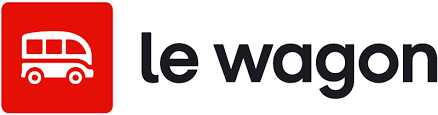

# First ML model

## Features engineering

### Data discovery

a) Download [`customer_segmentation.csv`](https://drive.google.com/file/d/1l2PxzOHeXYXT8t-TQdGAq2R_646_CKbU/view?usp=sharing) and load it into a `df` variable.

Describe data.

In [65]:
import pandas as pd
df = pd.read_csv('/content/customer_segmentation.csv')
df.describe()

,average_basket,average_price,visit_number,age,customer_id
count,9000.000000,8536.000000,9000.000000,8820.000000,9000.000000
mean,2.268667,4869.591495,4.811222,55.069501,4499.500000
std,1.557947,4098.673605,5.101245,10.186070,2598.220545
min,1.000000,-1.000000,1.000000,18.000000,0.000000
25%,1.000000,1807.000000,2.000000,48.000000,2249.750000
50%,2.000000,2926.000000,3.000000,55.000000,4499.500000
75%,3.000000,6997.250000,7.000000,62.000000,6749.250000
max,12.000000,28137.000000,33.000000,87.000000,8999.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         9000 non-null   object 
 1   client_type     9000 non-null   object 
 2   average_basket  9000 non-null   float64
 3   average_price   8536 non-null   float64
 4   visit_number    9000 non-null   float64
 5   age             8820 non-null   float64
 6   gender          8901 non-null   object 
 7   hobbies         887 non-null    object 
 8   customer_id     9000 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 632.9+ KB


In [67]:
df.isnull().mean()

country           0.000000
client_type       0.000000
average_basket    0.000000
average_price     0.051556
visit_number      0.000000
age               0.020000
gender            0.011000
hobbies           0.901444
customer_id       0.000000
dtype: float64

b) What type of machine learning problem it is ?
Identify features and target variables.



1.   Supervised problem : Classification
2.   Target: Client_type ;
3.   Features: country, avg_basket, avg_price, visit_number, age, gender, customers_id,hobbies




c) What do you think of `customer_id` column as feature? (no code required)

It's just the identification number of customers, which hasn't impact on targets.  

d) Delete `customer_id` column.

In [68]:
df = df.drop(columns=['customer_id'])
df

,country,client_type,average_basket,average_price,visit_number,age,gender,hobbies
0,it,occasional,2.0,756.0,2.0,46.0,female,NaN
1,uk,occasional,3.0,6229.0,1.0,66.0,male,NaN
2,fr,occasional,1.0,1803.0,2.0,64.0,male,NaN
3,fr,occasional,1.0,1857.0,3.0,52.0,male,NaN
4,fr,occasional,1.0,1761.0,2.0,58.0,male,NaN
...,...,...,...,...,...,...,...,...
8995,uk,occasional,2.0,6346.0,1.0,67.0,male,NaN
8996,it,occasional,2.0,1316.0,3.0,45.0,male,NaN
8997,fr,occasional,1.0,1956.0,3.0,43.0,female,NaN
8998,fr,occasional,1.0,1381.0,3.0,60.0,male,reading


e) With `.info()` Dataframe method, determine which column(s) have missing information? Which columns are of type text (object)?

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         9000 non-null   object 
 1   client_type     9000 non-null   object 
 2   average_basket  9000 non-null   float64
 3   average_price   8536 non-null   float64
 4   visit_number    9000 non-null   float64
 5   age             8820 non-null   float64
 6   gender          8901 non-null   object 
 7   hobbies         887 non-null    object 
dtypes: float64(4), object(4)
memory usage: 562.6+ KB




1.   Columns with missing info : average_price, age, gender, hobbies
2.   Columns text/object : country, client type, gender, hobbies



f) Before dealing with missing values, it is always important to check magnitudes of  numeric columns and see if there are any outlier.

With DataFrame `.describe()` method, determine outliers

In [70]:
df.describe()

,average_basket,average_price,visit_number,age
count,9000.000000,8536.000000,9000.000000,8820.000000
mean,2.268667,4869.591495,4.811222,55.069501
std,1.557947,4098.673605,5.101245,10.186070
min,1.000000,-1.000000,1.000000,18.000000
25%,1.000000,1807.000000,2.000000,48.000000
50%,2.000000,2926.000000,3.000000,55.000000
75%,3.000000,6997.250000,7.000000,62.000000
max,12.000000,28137.000000,33.000000,87.000000




*   Avg price : -1,  
*   



g) Delete rows with negative `average_price` column. Don't delete null rows, we will replace them with other values later.

Hint:
- use pandas masking techniques techniques
- use `df.average_price.isnull()` to select null rows

In [71]:
df.average_price.isnull().sort_values(ascending = False)

6988     True
8565     True
7036     True
1036     True
469      True
        ...  
3055    False
3054    False
3052    False
3051    False
8999    False
Name: average_price, Length: 9000, dtype: bool

In [72]:
# Create a mask for rows with negative average_price values
negative_mask = df['average_price'] < 0

# Apply the mask to delete rows with negative average_price values
df = df[~negative_mask]

In [73]:
# df['average_price'].min()
# get -1.0
# df['average_price'].argmin()
# get index
# df.drop(index = 5) 适用于只有少量 min 时

#######   df.drop(df[df['average_price']<0].index, inplace=True)    ########

In [74]:
# mask = df['average_price'] >= 0 # use mask for filtering
# mask.sort_values(ascending = True) for check values
# df = df[mask]
df

,country,client_type,average_basket,average_price,visit_number,age,gender,hobbies
0,it,occasional,2.0,756.0,2.0,46.0,female,NaN
1,uk,occasional,3.0,6229.0,1.0,66.0,male,NaN
2,fr,occasional,1.0,1803.0,2.0,64.0,male,NaN
3,fr,occasional,1.0,1857.0,3.0,52.0,male,NaN
4,fr,occasional,1.0,1761.0,2.0,58.0,male,NaN
...,...,...,...,...,...,...,...,...
8995,uk,occasional,2.0,6346.0,1.0,67.0,male,NaN
8996,it,occasional,2.0,1316.0,3.0,45.0,male,NaN
8997,fr,occasional,1.0,1956.0,3.0,43.0,female,NaN
8998,fr,occasional,1.0,1381.0,3.0,60.0,male,reading


### Handle missing values

h) To replace missing values, first make sure that they do not represent a large portion of  data.

Calculate proportion of missing values per column.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8769 entries, 0 to 8999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         8769 non-null   object 
 1   client_type     8769 non-null   object 
 2   average_basket  8769 non-null   float64
 3   average_price   8305 non-null   float64
 4   visit_number    8769 non-null   float64
 5   age             8593 non-null   float64
 6   gender          8672 non-null   object 
 7   hobbies         858 non-null    object 
dtypes: float64(4), object(4)
memory usage: 616.6+ KB


In [76]:
# df.isnul().mean()

In [77]:
pro_price = (df.average_price.isnull()).sum() / len(df.average_price)
pro_age = (df.age.isnull()).sum() / len(df.age)
pro_gender = (df.gender.isnull()).sum() / len(df.gender)
pro_hobbies = (df.hobbies.isnull()).sum() / len(df.hobbies)
pro_price, pro_age, pro_gender, pro_hobbies


(0.052913673166837726,
 0.020070703615007412,
 0.011061694605998403,
 0.9021553198768388)

Average_price, age, gender and hobbies columns have 5%, 2%, 1% and 90% missing values respectively.

i) What do you think of column `hobbies`? Can it be kept?

j) Delete `hobbies` column

In [78]:
df = df.drop(columns =['hobbies'])

k) Which strategies can you use to replace missing values of `average_price`, `age` and `gender` columns?



*   avg_price & age : average
*   gender: unknown



l) Replace missing values in the `gender` column with the mode. To do this, look at how to calculate the mode and then analyze the [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function of pandas.

In [79]:
mode = df['gender'].mode()[0]
mode

'male'

In [80]:
df['gender'].fillna(mode,inplace =True)

m) Replace missing values in the `average_price` and `age` columns with their respective means.

In [81]:
avg_price = df.average_price.mean()
avg_age = df.age.mean()
df.average_price.fillna(avg_price, inplace = True)
df.age.fillna(avg_age, inplace = True)

n) Check that `df` doesn't contain any missing value anymore.

In [82]:
df.isnull().mean() # to calculate the percentage

country           0.0
client_type       0.0
average_basket    0.0
average_price     0.0
visit_number      0.0
age               0.0
gender            0.0
dtype: float64

### Features / target split

o) Put features in a variable `X` and target column in a variable `y`.

In [83]:
x = df.drop(columns=['client_type'],axis =1)
y = df['client_type']
x

,country,average_basket,average_price,visit_number,age,gender
0,it,2.0,756.0,2.0,46.0,female
1,uk,3.0,6229.0,1.0,66.0,male
2,fr,1.0,1803.0,2.0,64.0,male
3,fr,1.0,1857.0,3.0,52.0,male
4,fr,1.0,1761.0,2.0,58.0,male
...,...,...,...,...,...,...
8995,uk,2.0,6346.0,1.0,67.0,male
8996,it,2.0,1316.0,3.0,45.0,male
8997,fr,1.0,1956.0,3.0,43.0,female
8998,fr,1.0,1381.0,3.0,60.0,male


### Encoding

p) Encode `y` with values 0, 1 et 2 with sklearn's [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) function. Check results and display classes.

In [84]:
df.groupby('client_type')['client_type'].count()

client_type
frequent      2126
occasional    6037
vip            606
Name: client_type, dtype: int64

In [85]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [86]:
le = LabelEncoder()
y_code = le.fit_transform(y)
print(y_code)
print(le.classes_)

[1 1 1 ... 1 1 1]
['frequent' 'occasional' 'vip']


Note that classes are encoded by alphabetical order.

q) In a new variable `X_dummy`, transform the text of `country` and `gender` columns with sklearn [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) function.

Display categories.

Note: Add sparse=False as parameter

In [87]:
on = OneHotEncoder(sparse=False)

dum_col = x[['country','gender']]
X_dummy = on.fit_transform(dum_col)
print(X_dummy)
on.categories_

[[0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['fr', 'it', 'uk'], dtype=object),
 array(['female', 'male'], dtype=object)]

r) What does this instruction do?

In [88]:
import numpy as np

dummy_cols = np.concatenate((on.categories_[0], on.categories_[1]), axis=None)
print(dummy_cols)

['fr' 'it' 'uk' 'female' 'male']


s) Transform `X_dummy` into a DataFrame object with the correct column names using the previous question.

In [89]:
X_dummy = pd.DataFrame(X_dummy, columns=['France','Italy','UK','female','male'])
X_dummy

,France,Italy,UK,female,male
0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
8764,0.0,0.0,1.0,0.0,1.0
8765,0.0,1.0,0.0,0.0,1.0
8766,1.0,0.0,0.0,1.0,0.0
8767,1.0,0.0,0.0,0.0,1.0


### Normalisation

All our features are now numerical !

We now need to normalize data.

t) In `X_num` variable, normalize values of `average_basket`, `average_price`, `visit_number` and `age` columns. You can use sklearn [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) function.

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [91]:
x_col = x[['average_basket','average_price','visit_number','age']]

u) Transform `X_num` into a DataFrame with good columns names.

In [92]:
X_num = scaler.fit_transform(x_col)
X_num

# the results are distributed around 0

array([[-0.17024904, -1.07207574, -0.55228343, -0.90226009],
       [ 0.47269404,  0.30880939, -0.74818866,  1.08556673],
       [-0.81319212, -0.80790861, -0.55228343,  0.88678405],
       ...,
       [-0.81319212, -0.76930539, -0.35637819, -1.20043411],
       [-0.81319212, -0.91438285, -0.35637819,  0.48921869],
       [-0.81319212, -0.71606826, -0.55228343,  0.58861003]])

In [93]:
X_num = pd.DataFrame(X_num, columns =['average_basket','average_price','visit_number','age'])
X_num

,average_basket,average_price,visit_number,age
0,-0.170249,-1.072076,-0.552283,-0.902260
1,0.472694,0.308809,-0.748189,1.085567
2,-0.813192,-0.807909,-0.552283,0.886784
3,-0.813192,-0.794284,-0.356378,-0.305912
4,-0.813192,-0.818506,-0.552283,0.290436
...,...,...,...,...
8764,-0.170249,0.338329,-0.748189,1.184958
8765,-0.170249,-0.930783,-0.356378,-1.001651
8766,-0.813192,-0.769305,-0.356378,-1.200434
8767,-0.813192,-0.914383,-0.356378,0.489219


### Join features

v) Group variables `X_dummy` and `X_num` into a `X` DataFrame with correct columns names.

You can use Pandas [concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) function.

Display result.

In [94]:
X = pd.concat(
    [X_dummy, X_num], axis = 1 # put axis = 1 to put the columns together
)
type(X)

pandas.core.frame.DataFrame

You should obtain:

In [95]:
X

,France,Italy,UK,female,male,average_basket,average_price,visit_number,age
0,0.0,1.0,0.0,1.0,0.0,-0.170249,-1.072076,-0.552283,-0.902260
1,0.0,0.0,1.0,0.0,1.0,0.472694,0.308809,-0.748189,1.085567
2,1.0,0.0,0.0,0.0,1.0,-0.813192,-0.807909,-0.552283,0.886784
3,1.0,0.0,0.0,0.0,1.0,-0.813192,-0.794284,-0.356378,-0.305912
4,1.0,0.0,0.0,0.0,1.0,-0.813192,-0.818506,-0.552283,0.290436
...,...,...,...,...,...,...,...,...,...
8764,0.0,0.0,1.0,0.0,1.0,-0.170249,0.338329,-0.748189,1.184958
8765,0.0,1.0,0.0,0.0,1.0,-0.170249,-0.930783,-0.356378,-1.001651
8766,1.0,0.0,0.0,1.0,0.0,-0.813192,-0.769305,-0.356378,-1.200434
8767,1.0,0.0,0.0,0.0,1.0,-0.813192,-0.914383,-0.356378,0.489219


Congratulations, you just cleaned data.

Data are now ready to be used to build a machine learning algorithm.

w) Summarize here the different steps you have made (as a memo).



1.   change the columns with text into code through LabelEnCoder & OneHotEnCoder
2.   normalisation the columns with float/int through Standardscaler in order to have a common scale for features



## Modelisation

a) Using sklearn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function and `X` and `y`, generate the dataframes `X_train`, `X_test`, `y_train`, `y_test`. The training sample (train) will represent 70% of the initial data.

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7)

b) From sklearn, create a model of type [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.score) and train it on your training data with `fit` method.

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
my_tree_classifier = DecisionTreeClassifier()
my_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

c) Using `my_tree_classifier`'s `score` method , display train and test scores. What do you notice?

In [100]:
print(my_tree_classifier.score(X_train, y_train))
print(my_tree_classifier.score(X_test, y_test))

1.0
0.9817559863169898


### Prediction

d) Download [`customer_segmentation_new.csv`](https://drive.google.com/file/d/1tGMXV9mH8EmPVlwcM-7pN5V2fTRgygsL/view?usp=sharing) in a variable `df_new`. This file contains new customers who do not have been categorized yet.
- Apply same transformations as before to obtain a dataframe `X_new` which will correspond to the transformed version of `df_new`
- From X_new and your previously trained model, predict the `y_predict` vector corresponding to the categorization of each of these new customers


**Warning**: It is important to keep the same transormations as in training. For example, an imputation by the average should be imputed by the same average as in training and not a new average. Similarly for transformations requiring a `fit_transform` step, you only need to use `transform` method. You don’t want to retrain your data.

In [101]:
df_new = pd.read_csv('/content/customer_segmentation_new.csv')
df_new

,country,average_basket,average_price,visit_number,age,gender,hobbies,customer_id
0,fr,2.0,6864.0,19.0,60.0,male,NaN,9000
1,uk,5.0,10703.0,13.0,51.0,female,NaN,9001
2,fr,1.0,2298.0,1.0,62.0,male,NaN,9002
3,fr,3.0,2343.0,4.0,41.0,female,sport,9003
4,fr,2.0,2383.0,2.0,49.0,male,NaN,9004
...,...,...,...,...,...,...,...,...
995,fr,2.0,1590.0,3.0,42.0,male,NaN,9995
996,fr,2.0,7075.0,14.0,64.0,female,NaN,9996
997,uk,3.0,NaN,4.0,50.0,female,reading,9997
998,fr,4.0,6408.0,7.0,47.0,male,NaN,9998


In [104]:
mask_average_price_positive_or_null = (df_new.average_price > 0) | (df_new.average_price.isnull())
df_new = df_new[mask_average_price_positive_or_null]
# df_new = df_new.drop("hobbies", axis=1)
df_new.loc[:, "gender"] = df_new["gender"].fillna(df_new["gender"].mode()[0])
df_new.loc[:, ["average_price", "age"]] = df_new[["average_price", "age"]].fillna(df_new['average_price'].mean())

X_new = df_new
X_new_dummy = pd.DataFrame(on.transform(X_new[["country", "gender"]]), columns=['France','Italy','UK','female','male'])
X_new_num = scaler.transform(X_new[["average_basket", "average_price", "visit_number", "age"]])
X_new_num = pd.DataFrame(X_new_num, columns=["average_basket", "average_price", "visit_number", "age"])
X_new = pd.concat([X_new_dummy, X_new_num], axis=1)
y_predict = my_tree_classifier.predict(X_new)

In [105]:
y_predict

array(['frequent', 'frequent', 'occasional', 'occasional', 'occasional',
       'frequent', 'frequent', 'frequent', 'frequent', 'occasional',
       'frequent', 'occasional', 'occasional', 'occasional', 'occasional',
       'occasional', 'occasional', 'occasional', 'occasional',
       'occasional', 'occasional', 'vip', 'occasional', 'occasional',
       'occasional', 'frequent', 'occasional', 'occasional', 'occasional',
       'occasional', 'occasional', 'frequent', 'frequent', 'occasional',
       'occasional', 'occasional', 'frequent', 'occasional', 'frequent',
       'frequent', 'occasional', 'occasional', 'occasional', 'frequent',
       'vip', 'frequent', 'occasional', 'frequent', 'occasional',
       'occasional', 'occasional', 'occasional', 'occasional',
       'occasional', 'occasional', 'occasional', 'occasional', 'frequent',
       'occasional', 'frequent', 'frequent', 'frequent', 'occasional',
       'frequent', 'occasional', 'frequent', 'frequent', 'occasional',
       'fr